In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import copy
import random
from tqdm import tqdm
import pandas as pd
from openpyxl import Workbook
from openpyxl.drawing.image import Image

In [2]:
class Box:
    def __init__(self,x,y,z,Starting_point = [0,0,0],Flip = 0,Stack = 0):
        self.Stack = Stack
        self.coor = np.array([x,y,z])
        self.Starting_point = Starting_point
        self.Xplace,self.Yplace , self.Zplace = 0,0,0
        
        self.Flip_Angle(x,y,z,Flip)

        self.setPlacing_point()
        #self.print_prop()
    def Manual_Flip(self,Angle = 0): #Warning: this change the "Current" Coordinate not the origin
        if Angle == 0 :
            #print("0")
            self.X,self.Y,self.Z = self.X,self.Y,self.Z
        elif Angle == 1:
            #print("1")
            self.X,self.Y,self.Z = self.Y,self.X,self.Z
        elif Angle == 2:
            #print("2")
            self.X,self.Y,self.Z = self.Z,self.Y,self.X
        self.setPlacing_point()
        self.coor = self.X,self.Y,self.Z
        #print("Manual_Flip")

    def Flip_Angle(self,x,y,z,Flip):
        if Flip == 0 :
            self.X,self.Y,self.Z = x,y,z
        elif Flip == 1 :
            self.X,self.Y,self.Z = y,x,z
        elif Flip == 2 :
            self.X,self.Y,self.Z = z,y,x

    def setPlacing_point(self):
        self.Zplace = [self.Starting_point[0], self.Starting_point[1], self.Z]
        self.Xplace = [self.X, self.Starting_point[1], self.Starting_point[2]]
        self.Yplace = [self.Starting_point[0], self.Y, self.Starting_point[2]]


def Check_edge(X,edge):
    if X[0] <= edge[0] and X[1] <= edge[1] and X[2] <= edge[2]:
        return False
    else:
        return True

def overlap_check(vector1, vector2):
   # print("vec1"+  str(vector1))
    #print("vec2"+  str(vector1))
    overlap = (vector1[0] < vector2[1] and vector1[1] > vector2[0])
    return overlap



15

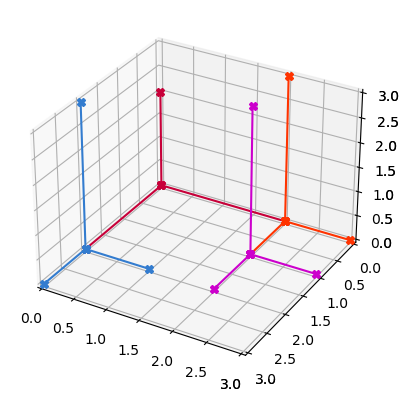

In [3]:
class Container:
    def __init__(self,x,y,z):
        self.X = x
        self.Y = y
        self.Z = z
        self.ignore = 0
        self.stack_arr =[]
        self.Log= []
        self.Current_Start_point = [[0,0,0]]
        #self.All_Point = []

        self.Default_color = ["#2E4374","#c70039","#ff3300","#337CCF","#cc00cc","#33cc33","#993300"]# Blue , red , orange
        #for report
        self.All_box = []
        self.invis_Start_point = []
        self.All_Point = []
    def Prop(self):
        print("--Prop--")
        print(self.All_Point)
        #print("invis")
        #print(self.invis_Start_point)
        #print(self.All_Point)
        #print("--------")
    def sum_list(self,list1,list2):
        result_list = [x + y for x, y in zip(list1, list2)]
        #print(result_list)
        return result_list

    def Insert_box(self,box):
        #box.print_prop()
        #print(box.coor)
        
        self.Log.append("InsertBox : "+str(box.coor)+str(box.Stack))
        
        #print(Check_edge(([1,2,3]+[2,3,4]),[2,2,2]))
       # self.Log.append("Start : "+str(self.Current_Start_point))
        #self.Log.append("invis : "+str(self.invis_Start_point))
        #self.Log.append("Start : "+str(self.All_Point))
        for index,Cur in enumerate(self.Current_Start_point):
            self.Log.append("----")
       
            
                    #box.Zplace[2] = self.Z -self.Current_Start_point[index][2]  
                   
                       
                     #box.Zplace[2] = self.Z 
                
                #self.Log.append("self.Current_Start_point[index][2]"+str(self.Current_Start_point[index]))
                #self.Log.append("stack cal")
                #self.Log.append(str(box.Zplace[2]))
            #print(self.invis_Start_point)
           # print(Cur)
            #print("box.Zplace[2]" + str(box.Zplace[2]))
            #print("self.Z" + str(self.Z))
            #print("Cur[2 : " + str(Cur[2]))
            if box.Stack == 1 :
            
                #print("[STACK]") 
              #Cur[2] + box.Zplace[2] < self.Z
                if (box.Zplace[2] < self.Z) & (Cur[2] != self.Z) & (Cur[2] + box.Zplace[2] < self.Z):
                    #chk_edgeZ = True
                    #print("<")
                    box.Zplace[2] = self.Z -self.Current_Start_point[index][2]  
                    
            
            chk_edgeX =  Check_edge(self.sum_list(box.Xplace,
                                                 self.Current_Start_point[index]),
                                                [self.X,self.Y,self.Z])
            chk_edgeY =  Check_edge(self.sum_list(box.Yplace,
                                                 self.Current_Start_point[index]),
                                                [self.X,self.Y,self.Z])
            chk_edgeZ =  Check_edge(self.sum_list(box.Zplace,
                                                 self.Current_Start_point[index]),
                                                [self.X,self.Y,self.Z])
              
            chk_collisions = self.Check_Collisions(self.invis_Start_point, # replace
                                  self.All_Point, # ALL point
                                  [self.sum_list(box.Xplace,self.Current_Start_point[index]),
                                  self.sum_list(box.Yplace,self.Current_Start_point[index]),
                                  self.sum_list(box.Zplace,self.Current_Start_point[index])],
                                  self.Current_Start_point[index])    
           # print("box.Zplace[2]" + str(box.Zplace[2]))
            #print("self.Z" + str(self.Z))
            #print("Cur[2 : " + str(Cur[2]))
            if box.Stack == 1 :

                if box.Zplace[2] > self.Z :
                    #print("<")
                    chk_edgeZ = True 
            #print(box.Zplace)
           #print(self.Z)
            #print(chk_collisions)
            self.Log.append([chk_collisions,chk_edgeX,chk_edgeY,chk_edgeZ])
            #self.Log.append("Current_Start_point : "+str(self.Current_Start_point[index]))
            #self.Log.append("box.Zplace : "+str(box.Zplace))
            #self.Log.append("chk_edgeZ: "+str(self.sum_list(box.Zplace,self.Current_Start_point[index])))
           # print("chk_edgeZ" + str(chk_edgeZ))
            if chk_collisions or chk_edgeX or chk_edgeY or chk_edgeZ:
                #print(".")
                #self.Log.append(str(chk_collisions)+str(chk_edgeX)+str(chk_edgeY)+str(chk_edgeZ))
                #self.Log.append("Ignore ")
                #self.Log.append("Check col: "+str(chk_collisions))
               # self.Log.append("Check chk_edgeX: "+str(chk_edgeX))
                #self.Log.append("Check chk_edgeY: "+str(chk_edgeY))
               # self.Log.append("Check chk_edgeZ: "+str(chk_edgeZ))
                #print(chk_collisions , chk_edgeX , chk_edgeY , chk_edgeZ)
                #print("skip")
                self.ignore + 1
            else:
                
                #print("Max :" +str(self.Z))
                #print(box.Zplace[2])
                #self.Log.append("Box Stack"+str(box.Stack))
                self.stack_arr.append(box.Stack)
                self.All_box.append(box.coor)


                self.Current_Start_point.append(self.sum_list(box.Xplace,self.Current_Start_point[index]))
                self.Current_Start_point.append(self.sum_list(box.Yplace,self.Current_Start_point[index]))
                self.Current_Start_point.append(self.sum_list(box.Zplace,self.Current_Start_point[index]))

                self.All_Point.append([self.sum_list(box.Xplace,self.Current_Start_point[index]),
                                           self.sum_list(box.Yplace,self.Current_Start_point[index]),
                                           self.sum_list(box.Zplace,self.Current_Start_point[index])])

                    #np.append(self.Start_point,box.Xplace)




                self.invis_Start_point.append(self.Current_Start_point[index])


                #self.Log.append("Take Start point")
                self.Current_Start_point.pop(index)
                break;





    def Check_Collisions(self,Start,Point,Target,Current):
        

        if Start != []:
            for i in range(len(Start)) :

                #print("i===============>" +  str(i))
                

                vec1_X = [Start[i][0] , Point[i][0][0]]
                vec1_Y = [Start[i][1] , Point[i][1][1]]
                vec1_Z = [Start[i][2] , Point[i][2][2]]

                vec2_X = [Current[0]  ,  Target[0][0]]
                vec2_Y = [Current[1]  ,  Target[1][1]]
                vec2_Z = [Current[2]  ,  Target[2][2]]
                overlap_values = 0
                #self.Log.append("-----")
               
               # self.Log.append([vec1_X,vec1_Y,vec1_Z])
                #self.Log.append([vec2_X,vec2_Y,vec2_Z])
                #self.Log.append("-----")
                if overlap_check(vec1_X,vec2_X) :
                    #print("overlap : true")
                    #print(vec1_X,vec2_X)
                    overlap_values = overlap_values + 1
                if overlap_check(vec1_Y,vec2_Y) :
                    #print("overlap : true")
                    #print(vec1_Y,vec2_Y)
                    overlap_values= overlap_values + 1
                if overlap_check(vec1_Z,vec2_Z) :
                    #print("overlap : true")
                    #print(vec1_Z,vec2_Z)
                    overlap_values= overlap_values + 1
                #print("=====overlap_values=====")
                if overlap_values >=3 :
                    self.Log.append(overlap_values)
                    break;
            self.Log.append(overlap_values)

            if overlap_values >=3 :
                #self.Log.append("Check Collisions : True")
                return True
            else:
                #self.Log.append("Check Collisions : False")
                return False
        else:
            #self.Log.append("Check Collisions :False")
            return False
    def Evaluate(self):
        Max = self.X * self.Y * self.Z
        
        result = 0
        for j in self.All_box:
            
            result  = result + (j[0] * j[1] * j[2])
      
        
        #print(str(Max) + "  __ "+str(result))
        return Max - result
    
    def Plot(self):
        #setup
        ax = plt.axes(projection = "3d")
        ax.set_xlim([0,self.Y])
        ax.set_ylim([self.X,0])
        ax.set_zlim([0,self.Z])
        num = 0
        #for i in self.Current_Start_point:
            #print(i)
            #ax.scatter(i[0],i[1],i[2], c =self.Default_color[0])
            #line

        for index,j in enumerate(self.All_Point):

            num = num+1
            if num > 6 : num = 0
            X = self.invis_Start_point[index]
            Y = self.All_Point[index]
            #print("LINE")
            #print(X,Y)
            #print([X[0],X[0]],[Y[1][1],Y[1][0]],[0,0])

            ax.plot([X[0],X[0]]# X
                    ,[Y[1][1],Y[0][1]],
                    [Y[1][2],Y[1][2]],
                   color=self.Default_color[num], marker='X')
            ax.plot([Y[1][0],Y[0][0]]# Y
                    ,[X[1],X[1]],
                    [Y[1][2],Y[1][2]],
                   color=self.Default_color[num], marker='X')

            ax.plot( [Y[1][0],Y[1][0]]# Z
                    ,[Y[0][1],Y[0][1]],
                    [X[2],Y[2][2]],
                   color=self.Default_color[num], marker='X')
            #print("_")
            #print( [Y[1][0],Y[1][0]]# Z
             #       ,[Y[0][1],Y[0][1]],
              #      [X[2],Y[2][2]])
    def Plot_CUBE(self):
        #setup
        x, y, z = np.indices((self.X, self.Y, self.Z))
        colors = np.empty((self.X, self.Y, self.Z), dtype=object)
        ax = plt.axes(projection = "3d")
        ax.set_xlim([0,self.Y])
        ax.set_ylim([self.X,0])
        ax.set_zlim([0,self.Z])
        num = 0
        cube_df = pd.DataFrame({"1" : self.All_box , "2" : self.All_Point})
        
        

        
        for index,j in enumerate(zip(cube_df["1"],cube_df["2"])):
            cube_x = j[1][0][0] - j[0][0]
            cube_y = j[1][1][1] - j[0][1]
            cube_z = j[1][2][2] - j[0][2] # start plot point
            
            if self.stack_arr[index] == 1:
                cube_z = 0
            #print(j)
            #print(str(cube_x) +"-"  + str(j[1][0][0]))
            #print(str(cube_y) +"-"  + str(j[1][1][1]))
            #print(str(cube_z) +"-"  + str(j[1][2][2]))
            cube  = ((x < j[1][0][0]) & (x >= cube_x)) & ((y < j[1][1][1]) & (y >= cube_y)) & ((z < j[1][2][2]) & (z >= cube_z))
            if index == 0 : 
                voxelarray = cube
                colors[cube] = 'blue'
            else :
                voxelarray |= cube
                colors[cube] = 'blue'
            if index == (len(self.All_box)-1):
                #print("index == len")
                colors[cube] = 'red'

            
       # ax.voxels(voxelarray)
        #colors = np.empty(voxelarray.shape, dtype=object)
        #print(colors)
        ax.voxels(voxelarray, facecolors=colors, edgecolor='k')#, facecolors=colors
            
myContainer =  Container(3,3,3)



#[0, 0, 0, 1, 0, 0, 0]
myContainer.Insert_box(Box(2, 2, 2,Stack =0))
myContainer.Insert_box(Box(1, 1, 1,Stack =1))
myContainer.Insert_box(Box(1, 1, 1,Stack =1))
#print(":___")
myContainer.Insert_box(Box(1, 1, 2,Stack =1))




#
#[array([1, 1, 2]), array([2, 1, 3]), array([1, 1, 3])]
#array([1, 1, 1]), array([2, 2, 4]), array([2, 1, 1]), array([1, 1, 1])
#print(len(myContainer.All_box))
myContainer.Plot_CUBE()

#myContainer.Report()
myContainer.Evaluate()
#myContainer.invis_Start_point
myContainer.All_box
#myContainer.Log
#print(myContainer.All_Point)
#myContainer.All_Point
#myContainer.stack_arr
myContainer.Plot()
myContainer.Evaluate()


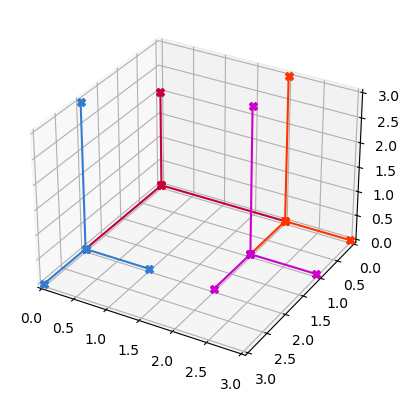

In [4]:
myContainer.Plot()


In [5]:
test_df = pd.DataFrame({"1" : myContainer.All_box , "2" : myContainer.All_Point})
for i,j in enumerate(zip(test_df["1"],test_df["2"])):
    print(i,j)
    print(j[0][0])
#cube_x = j[1][0][0] - j[0][0]
            #cube_y = j[1][1][1] - j[0][1]
            #cube_z = j[1][2][2] - j[0][2]
    #print(j[0][0])

0 (array([2, 2, 2]), [[2, 0, 0], [0, 2, 0], [0, 0, 2]])
2
1 (array([1, 1, 1]), [[3, 0, 0], [2, 1, 0], [2, 0, 3]])
1
2 (array([1, 1, 1]), [[1, 2, 0], [0, 3, 0], [0, 2, 3]])
1
3 (array([1, 1, 2]), [[3, 1, 0], [2, 2, 0], [2, 1, 3]])
1


In [6]:
#SEED

n = 200 # numbers of box
t_range = 100 # testing range. increase the possibility to find a new path but trade with efficiency
mutate_range =  10
Boxs = []
Evaluate_test = []
seed= []
#testz = []

stack_array = random.choices([0, 1], weights=[0.7, 0.3], k=n) # random the stack 0 and 1 with bias 70%

Container_X,Container_Y,Container_Z = 10,10,10
Space = Container_X*Container_Y*Container_Z

for i in stack_array:
    x,y,z = np.random.randint(1,5),np.random.randint(1,5),np.random.randint(1,5)
    #Boxs.append(Box(x,y,z))
    #stack_rnd = biased_random()
    Boxs.append(Box(x,y,z,Stack = i))
    
for h in range(t_range): #Generate(seed) Loop
    np.random.shuffle(Boxs)
    seed.append(copy.deepcopy(Boxs))
    
for c in range(mutate_range):
    Container_arr = []
    print(str(c+1))
    print("box n      : " +str(n) )
    print("seed range : " +str(t_range) )
    Evaluate_test = []
    for i in tqdm(seed):# seed loop
        Test_Container = Container(Container_X,Container_Y,Container_Z)
        for box in i: # INSERT loop
                #print(box.coor)
            Test_Container.Insert_box(box)
        Evaluate_test.append(Test_Container.Evaluate())# EVA
        Container_arr.append(Test_Container)
        #if Evaluate_test[index[0]] == 0 : break;
    index  = np.array(Evaluate_test).argsort()
    #print(index)
        
    print("empty Space   : "+str((Evaluate_test[index[0]]/Space) * 100) + "%")
    print("Current       : [["+str(Evaluate_test[index[0]])+"]]")
    print("Seed          :  " + str(Evaluate_test))
    #mutate loop
    for l in range(1,t_range):
        #print(l)
        np.random.shuffle(seed[index[l]])
        for k in range(n): # Flip loop # more path explore but less speed. much more effective if inc seed size
            random_flip = np.random.randint(0,3)
            seed[index[l]][k].Manual_Flip(random_flip)
            #print(l)
            #np.random.shuffle(seed[l])
            #print("______")
    
    #print("---")
#index  = np.array(Evaluate_test).argsort()


    #print(Evaluate_test[index[0]])

1
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.45it/s]


empty Space   : 12.6%
Current       : [[126]]
Seed          :  [248, 306, 353, 305, 318, 400, 307, 390, 362, 371, 222, 349, 272, 264, 327, 435, 427, 193, 325, 284, 394, 317, 256, 377, 265, 353, 420, 262, 341, 350, 338, 203, 354, 278, 451, 349, 411, 213, 312, 317, 320, 406, 371, 281, 252, 341, 343, 398, 308, 376, 274, 294, 194, 318, 272, 375, 381, 241, 257, 170, 284, 287, 381, 340, 403, 448, 392, 293, 214, 301, 364, 244, 395, 354, 386, 359, 484, 309, 463, 418, 301, 363, 318, 314, 233, 379, 427, 307, 290, 286, 126, 293, 297, 319, 285, 302, 274, 349, 313, 434]
2
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:08<00:00,  1.46it/s]


empty Space   : 12.6%
Current       : [[126]]
Seed          :  [337, 388, 276, 336, 361, 381, 356, 308, 491, 365, 462, 141, 278, 457, 399, 382, 323, 425, 453, 267, 205, 394, 290, 495, 235, 522, 346, 231, 319, 367, 256, 222, 242, 359, 283, 244, 490, 411, 294, 197, 205, 341, 422, 375, 348, 332, 287, 264, 410, 220, 336, 295, 247, 393, 241, 249, 444, 207, 403, 309, 305, 360, 356, 331, 330, 324, 351, 312, 294, 238, 267, 368, 428, 264, 309, 477, 247, 578, 416, 372, 303, 284, 300, 341, 294, 302, 446, 265, 188, 332, 126, 373, 285, 497, 404, 330, 279, 333, 276, 263]
3
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:08<00:00,  1.46it/s]


empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [317, 326, 320, 215, 313, 370, 356, 246, 467, 459, 355, 479, 455, 346, 363, 309, 350, 257, 512, 443, 343, 334, 394, 474, 412, 404, 301, 325, 234, 397, 352, 283, 359, 309, 307, 395, 364, 418, 245, 270, 375, 286, 325, 233, 288, 450, 307, 268, 199, 365, 396, 325, 189, 266, 237, 446, 329, 454, 385, 237, 352, 277, 307, 275, 371, 199, 246, 224, 387, 242, 175, 313, 161, 210, 237, 524, 294, 333, 529, 344, 383, 325, 334, 251, 446, 391, 97, 326, 331, 263, 126, 229, 221, 264, 234, 317, 318, 349, 443, 324]
4
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [302, 328, 338, 329, 211, 373, 288, 440, 359, 329, 351, 254, 369, 312, 303, 198, 321, 263, 290, 390, 312, 324, 343, 231, 298, 212, 600, 402, 264, 368, 383, 252, 459, 209, 442, 326, 350, 217, 337, 402, 324, 211, 328, 300, 362, 353, 321, 318, 443, 368, 398, 308, 332, 477, 367, 325, 321, 173, 374, 280, 398, 425, 279, 253, 336, 297, 347, 380, 342, 311, 321, 300, 289, 351, 237, 265, 395, 338, 229, 460, 347, 287, 342, 365, 364, 408, 97, 368, 387, 203, 233, 234, 305, 383, 280, 473, 506, 326, 412, 351]
5
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:10<00:00,  1.42it/s]


empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [278, 236, 389, 219, 307, 345, 308, 370, 267, 309, 177, 287, 372, 369, 470, 310, 137, 373, 257, 483, 364, 510, 326, 291, 303, 279, 421, 421, 249, 278, 187, 330, 349, 220, 289, 289, 332, 271, 289, 436, 263, 283, 413, 373, 494, 340, 217, 300, 264, 302, 307, 363, 344, 284, 348, 316, 404, 210, 348, 354, 263, 152, 182, 286, 224, 343, 331, 324, 502, 261, 314, 364, 376, 240, 295, 466, 289, 367, 277, 452, 440, 313, 359, 311, 289, 224, 97, 313, 511, 342, 349, 352, 262, 262, 163, 323, 277, 417, 232, 296]
6
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:10<00:00,  1.42it/s]


empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [356, 217, 389, 352, 322, 239, 363, 396, 358, 374, 311, 459, 363, 481, 265, 263, 236, 336, 370, 314, 274, 188, 312, 496, 349, 305, 280, 368, 341, 210, 301, 318, 338, 334, 472, 434, 358, 419, 429, 353, 253, 313, 401, 537, 272, 304, 360, 353, 295, 322, 344, 272, 211, 265, 424, 360, 303, 373, 424, 309, 213, 239, 300, 199, 363, 367, 279, 382, 188, 217, 486, 400, 364, 296, 376, 460, 349, 421, 396, 349, 373, 315, 265, 328, 400, 467, 97, 375, 207, 244, 190, 361, 178, 257, 374, 199, 129, 383, 279, 434]
7
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:10<00:00,  1.41it/s]


empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [345, 398, 271, 497, 270, 420, 543, 354, 231, 223, 445, 282, 381, 344, 286, 329, 222, 388, 293, 229, 415, 342, 352, 387, 349, 244, 322, 232, 161, 338, 315, 359, 303, 519, 315, 607, 285, 304, 294, 355, 415, 341, 142, 181, 357, 234, 333, 397, 266, 443, 332, 312, 381, 440, 357, 304, 285, 272, 326, 244, 394, 365, 269, 377, 297, 334, 227, 305, 275, 435, 184, 248, 277, 226, 371, 459, 348, 385, 275, 185, 302, 300, 279, 251, 108, 285, 97, 363, 322, 302, 215, 379, 288, 298, 180, 404, 346, 477, 289, 325]
8
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:08<00:00,  1.45it/s]


empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [333, 337, 423, 226, 270, 361, 539, 347, 420, 368, 440, 430, 214, 209, 172, 449, 388, 292, 370, 309, 429, 177, 147, 291, 334, 443, 459, 379, 582, 395, 458, 415, 296, 344, 266, 282, 404, 337, 274, 332, 358, 336, 313, 337, 336, 354, 360, 291, 283, 241, 331, 453, 416, 363, 287, 280, 346, 159, 326, 382, 294, 427, 336, 371, 239, 461, 192, 337, 358, 334, 258, 480, 218, 309, 394, 358, 365, 387, 310, 497, 343, 254, 242, 462, 314, 282, 97, 278, 322, 384, 244, 362, 457, 257, 444, 218, 391, 437, 238, 333]
9
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [387, 346, 325, 409, 194, 299, 278, 294, 282, 379, 366, 183, 300, 356, 206, 199, 423, 372, 333, 371, 403, 344, 436, 491, 223, 345, 260, 398, 317, 448, 297, 254, 239, 300, 225, 288, 318, 284, 285, 332, 321, 398, 445, 411, 298, 202, 341, 346, 278, 303, 274, 366, 304, 277, 285, 381, 371, 308, 295, 401, 300, 353, 177, 315, 236, 340, 364, 316, 335, 394, 187, 349, 268, 441, 413, 172, 262, 294, 312, 214, 429, 301, 335, 175, 526, 296, 97, 443, 450, 255, 319, 288, 220, 229, 220, 465, 245, 343, 275, 333]
10
box n      : 200
seed range : 100


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:08<00:00,  1.45it/s]

empty Space   : 9.700000000000001%
Current       : [[97]]
Seed          :  [298, 372, 409, 177, 425, 368, 248, 276, 340, 246, 411, 266, 316, 493, 291, 282, 366, 297, 448, 354, 340, 231, 321, 447, 320, 349, 302, 244, 331, 397, 310, 345, 365, 396, 401, 389, 336, 320, 446, 278, 260, 212, 336, 324, 366, 426, 355, 266, 368, 314, 227, 493, 199, 432, 343, 184, 318, 232, 222, 474, 241, 259, 412, 436, 470, 300, 299, 335, 256, 352, 414, 247, 274, 252, 336, 331, 276, 251, 477, 571, 280, 195, 123, 354, 418, 371, 97, 261, 432, 296, 362, 370, 433, 323, 285, 437, 427, 476, 331, 342]


In [7]:
Evaluate_test[index[0]]

97

100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [23:58<00:00, 20.55s/it]


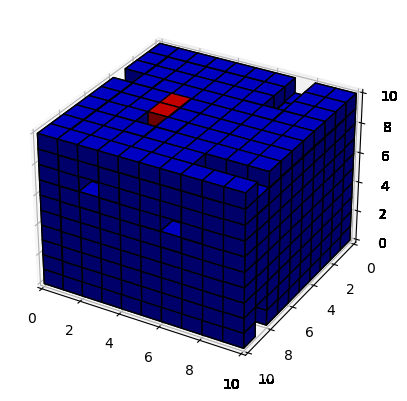

In [8]:
Filter_ = 100
report_eva = []
testset = (Container_arr[index[0]].All_box)
report_eva = []
test_case_Container =  Container(10,10,10)
img = 0
for i,j in zip(tqdm(testset[:Filter_]) , Container_arr[index[0]].stack_arr[:Filter_]):
    #print(i)
    #print(img)
    #print("stack : "+ str(j))
    test_case_Container.Insert_box(Box(i[0], i[1], i[2],Stack =j))
    report_eva.append(test_case_Container.Evaluate())
    img += 1
    test_case_Container.Plot()
    plt.savefig(str(img))
    test_case_Container.Plot_CUBE()
    plt.savefig(str(img)+'c')
#test_case_Container.Evaluate()

In [9]:
#outdate
import pandas as pd
df = pd.DataFrame({"Evaluate" : report_eva ,
              "List of box": testset ,
              "Stack" : Container_arr[index[0]].stack_arr})
df.to_excel("output.xlsx") 

In [10]:
# Create a new workbook and select the active sheet
stack = Container_arr[index[0]].stack_arr
workbook = Workbook()
sheet = workbook.active
sheet['A1'] = 'No. of box selected'
sheet['B1'] = 'Evaluate'
sheet['C1'] = 'List of box'
sheet['D1'] = 'Stack'
sheet['E1'] = 'Structure'
sheet['F1'] = 'Cube'

sheet.column_dimensions['E'].width = 30
sheet.column_dimensions['F'].width = 30

#h = range(2,len(report_eva)+2)
for index,i in enumerate(report_eva) : 
    sheet.row_dimensions[index+2].height = 150
    print(index)
    sheet['A' + str(index+2)] = index
    sheet['B' + str(index+2)] = report_eva[index]
    sheet['C' + str(index+2)] = str(testset[index])
    sheet['D' + str(index+2)] = str(stack[index])
    #img
    
    img = Image(str(index+1)+'.png')
    img.width = 200
    img.height = 200
    sheet.add_image(img, 'E'+ str(index+2)) 
    
    #img
    img = Image(str(index+1)+'c.png')
    img.width = 200
    img.height = 200
    sheet.add_image(img, 'F'+ str(index+2)) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [11]:
workbook.save('example.xlsx')